In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Titanic Dataset
# Replace 'titanic.csv' with the path to your dataset file
df = pd.read_csv('Titanic Dataset.csv')

In [2]:
# Step 3: Data Preprocessing
# Handle missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'].fillna('S', inplace=True)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Step 4: Feature Selection
# Select relevant features for clustering
features = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex']]

# Step 5: Standardize the Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

C:\Users\Jain\AppData\Local\Temp\ipykernel_7444\3143484835.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Jain\AppData\Local\Temp\ipykernel_7444\3143484835.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

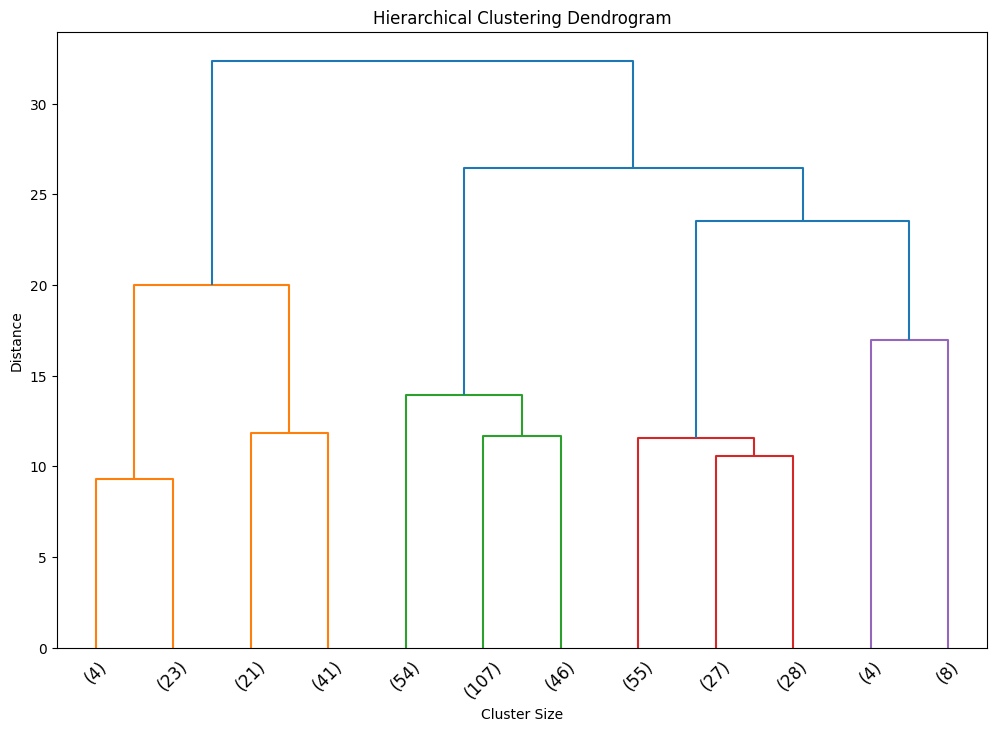

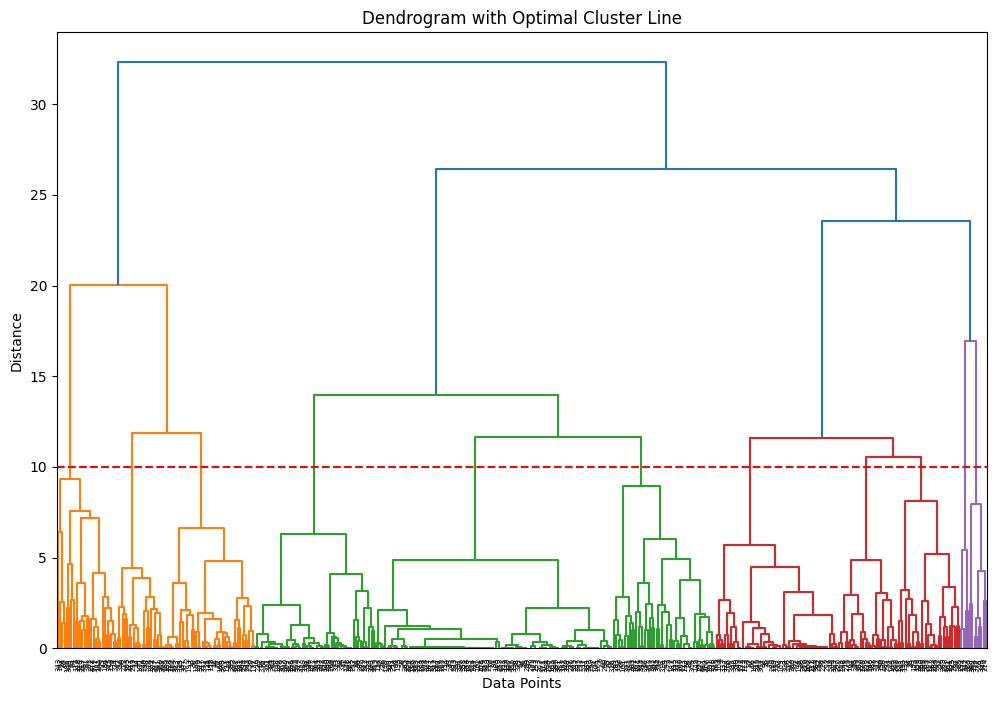

In [3]:
# Step 6: Hierarchical Clustering
# Compute the linkage matrix
linkage_matrix = linkage(scaled_features, method='ward')

# Step 7: Determine Optimal Number of Clusters using the Elbow Method
# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Optional: Add a horizontal line to visualize cluster cutoff
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.axhline(y=10, color='r', linestyle='--')  # Adjust 'y' for the cutoff threshold
plt.title('Dendrogram with Optimal Cluster Line')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [4]:
# Step 8: Form Clusters
# Choose a cutoff distance or number of clusters
num_clusters = 3  # Example: Choose based on the dendrogram
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add the cluster labels to the original dataset
df['Cluster'] = clusters

# Display the dataset with cluster labels
print(df[['PassengerId', 'Cluster']].head())

   PassengerId  Cluster
0          892        2
1          893        3
2          894        1
3          895        2
4          896        3
